# Fundamentals of Computer Vision

This Jupyter Notebook covers **Project 4** of the course and introduces fundamental concepts of the Feature Descriptors (Normalized Color Histogram, Color Space Changes, SIFT, SURF, and ORB) and Bag of Words in image processing. Each section has questions that must be answered in a Document in PDF format.

**Important**

Both the Feature Descriptors and Bag of Words tasks (Code + Answers) must be submitted; otherwise, your work will be rejected.


## Grading Breakdown: ##
- Feature Descriptors: 40 points (Code: 24 pts, Answers: 16 pts).
- Bag of Words: 60 points (Code: 36 pts, Answers: 24 pts).

To pass Project 4, a minimum of **50 points** is required.

# **Feature Descriptors**

## **Normalized Color Histograms and Color Space Transformations**

In this exercise, you will implement normalised colour histograms and apply colour space transformations as essential components of feature descriptors. These descriptors capture key characteristics or patterns within an image, enabling effective comparison, matching, and classification. Follow the steps below to complete the implementation:

1. **Load and Display the Image:**
* Read the input image using OpenCV.
* Convert the color format from BGR to RGB for proper visualisation with `matplotlib`.
* Display the original image using `matplotlib` to verify the input data.

2. **Compute Normalized Histograms for RGB:**
* Calculate a normalized histogram to represent the frequency of intensity values.
* Ensure the histogram values are scaled to sum to 1 for normalization.
* Visualize the histogram to observe and compare intensity distributions.

3. **Transform Image to Other Color Spaces:**
* Convert the image to different color spaces: HSV, LAB, and YCrCb. Use OpenCV's color conversion functions (`cv2.cvtColor`) to perform the transformations.

4. **Compute and Visualize Histograms for Each Color Space:**
* Compute normalized histograms.
* Visualize the histograms to observe how intensity distributions vary across color spaces.

5. **Compare Histograms:**
* Compare histograms using a similarity metric, such as correlation (`cv2.compareHis`)

6. **Return Results:**
* Return all generated histograms and their visualizations.
* Provide computed similarity scores for comparisons.

In [248]:
# Functions and Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# this function uses cv2 because I had some difficulties with the manual function at the beginning
#def compute_normalized_histogram2(image, color_space_name):
#    histograms = []
#   channels = image.shape[-1]
#
#   # Compute histogram for each channel
#   for i in range(channels):
#       hist = cv2.calcHist([image], [i], None, [256], [0, 256])
#       hist /= hist.sum()  # Normalize the histogram
#       histograms.append(hist)
#
#   return histograms


def compute_normalized_histogram(image, color_space_name):
    histograms = [] # initialize array
    channels = image.shape[-1]

    for i in range(channels): # loop through channels
        
        # extract data
        channel_data = image[..., i] 
        
        # initialize array
        distribution = np.zeros(256, dtype=np.float32) 
        
        # Count occurrences 
        for val in channel_data.flatten(): 
            distribution[val] += 1
        
        # Normalize the histograms
        distribution /= np.sum(distribution)
        
        # Reshape and append
        distribution = distribution.reshape(-1, 1)
        histograms.append(distribution)

    return histograms

def compute_histogram(image, color_space_name):
    histograms = [] # initialize array
    channels = image.shape[-1]

    for i in range(channels): # loop through channels
        
        # extract data
        channel_data = image[..., i] 
        
        # initialize array
        distribution = np.zeros(256, dtype=np.float32) 
        
        # Count occurrences 
        for val in channel_data.flatten(): 
            distribution[val] += 1
        
        # Reshape and append
        distribution = distribution.reshape(-1, 1)
        histograms.append(distribution)

    return histograms
    

def plot_histogram_and_image(image, histograms, color_space_name, image_name):
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image) 
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    
    COLOR_SPACE_INFO = {
        'RGB': {
            'labels': ['R', 'G', 'B'],
            'colors': ['red', 'green', 'blue']
        },
        'BGR': {
            'labels': ['B', 'G', 'R'],
            'colors': ['blue', 'green', 'red']
        },
        'HSV': {
            'labels': ['H', 'S', 'V'],
            'colors': ['darkorange', 'limegreen', 'dodgerblue']
        },
        'LAB': {
            'labels': ['L', 'A', 'B'],
            'colors': ['black', 'darkred', 'darkblue']
        },
        'YCrCb': {
            'labels': ['Y', 'Cr', 'Cb'],
            'colors': ['goldenrod', 'orangered', 'dodgerblue']
        }
    }

    channels = image.shape[-1]

    if color_space_name in COLOR_SPACE_INFO:
        channel_labels = COLOR_SPACE_INFO[color_space_name]['labels'][:channels]
        channel_colors = COLOR_SPACE_INFO[color_space_name]['colors'][:channels]
    else:
        # Fallback
        channel_labels = [f'Channel {i}' for i in range(channels)]
        channel_colors = ['gray'] * channels
        
    # Compute histogram for each channel 
    for i, color in enumerate(colors):
        hist = histograms[i]
        plt.bar(range(256), hist.flatten(),  color=channel_colors[i] ,  label=channel_labels[i], alpha=0.5)
            
        
    plt.title(f"Normalized Histogram ({color_space_name})")
    plt.xlabel("Intensity")
    plt.ylabel("Normalized Frequency")
    plt.savefig(f"Normalized_Histogram_({color_space_name})_of_{image_name}.jpeg")
    plt.legend()
    plt.show()
        
   
def plot_histogram(image, histograms, color_space_name, image_name):
    
    COLOR_SPACE_INFO = {
        'RGB': {
            'labels': ['R', 'G', 'B'],
            'colors': ['red', 'green', 'blue']
        },
        'BGR': {
            'labels': ['B', 'G', 'R'],
            'colors': ['blue', 'green', 'red']
        },
        'HSV': {
            'labels': ['H', 'S', 'V'],
            'colors': ['darkorange', 'limegreen', 'dodgerblue']
        },
        'LAB': {
            'labels': ['L', 'A', 'B'],
            'colors': ['black', 'darkred', 'darkblue']
        },
        'YCrCb': {
            'labels': ['Y', 'Cr', 'Cb'],
            'colors': ['goldenrod', 'orangered', 'dodgerblue']
        }
    }

    channels = image.shape[-1]

    if color_space_name in COLOR_SPACE_INFO:
        channel_labels = COLOR_SPACE_INFO[color_space_name]['labels'][:channels]
        channel_colors = COLOR_SPACE_INFO[color_space_name]['colors'][:channels]
    else:
        # Fallback
        channel_labels = [f'Channel {i}' for i in range(channels)]
        channel_colors = ['gray'] * channels
        
    # Compute histogram for each channel 
    for i, color in enumerate(colors):
        hist = histograms[i]
        plt.bar(range(256), hist.flatten(),  color=channel_colors[i] ,  label=channel_labels[i], alpha=0.5)
            
        
    plt.title(f"Normalized Histogram {color_space_name} of {image_name}")
    plt.xlabel("Intensity")
    plt.ylabel("Normalized Frequency")
    plt.legend()
    plt.savefig(f"Normalized_Histogram_({color_space_name})_of_{image_name}.jpeg")
    plt.show()
    
    

def compare_histograms_via_correlation(hist1, hist2):
    # Compare histograms using correlation
    scores = []
    for h1, h2 in zip(hist1, hist2):
        score = cv2.compareHist(h1, h2, cv2.HISTCMP_CORREL)
        scores.append(score)
    return scores

def salt_pepper(image, salt_prob, pepper_prob):
    """
    Add salt and pepper noise to an image.

    :param image: Input image (NumPy array).
    :param salt_prob: Probability of adding salt noise (white pixels).
    :param pepper_prob: Probability of adding pepper noise (black pixels).
    :return: Noisy image with salt and pepper noise added.
    """
    noisy_image = np.copy(image)

    # Salt noise (white pixels)
    num_salt = np.ceil(salt_prob * image.size).astype(int)
    coords_salt = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[tuple(coords_salt)] = 255  # For salt (white)

    # Pepper noise (black pixels)
    num_pepper = np.ceil(pepper_prob * image.size).astype(int)
    coords_pepper = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[tuple(coords_pepper)] = 0  # For pepper (black)

    return noisy_image

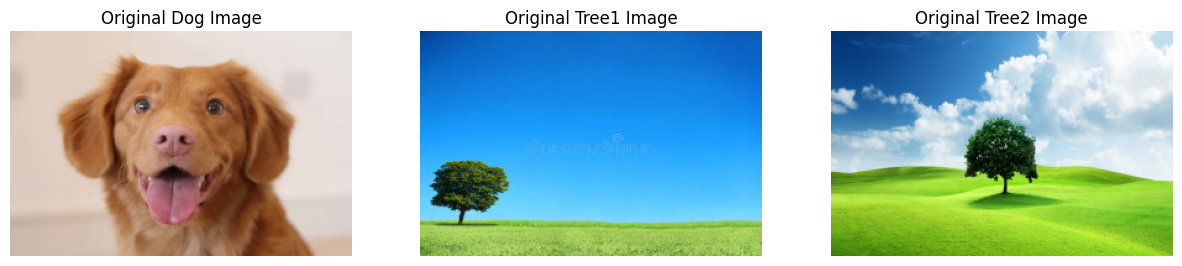

In [249]:
#1. Load and Display the Image:

# Convertion of BGR to RGB 
image_bgr_dog = cv2.imread("images/dataset_histograms/dog.jpg")
image_bgr_tree1 = cv2.imread("images/dataset_histograms/tree1.jpg")
image_bgr_tree2 = cv2.imread("images/dataset_histograms/tree2.jpg")

image_RGB_dog = cv2.cvtColor(image_bgr_dog, cv2.COLOR_BGR2RGB)
image_RGB_tree1 = cv2.cvtColor(image_bgr_tree1, cv2.COLOR_BGR2RGB)
image_HSV_tree2 = cv2.cvtColor(image_bgr_tree2, cv2.COLOR_BGR2RGB)

# Display of the original Image

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title("Original Dog Image")
plt.imshow(image_RGB_dog)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Original Tree1 Image")
plt.imshow(image_RGB_tree1)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Original Tree2 Image")
plt.imshow(image_RGB_tree2)
plt.axis('off')

plt.savefig("Original Images")

plt.show()

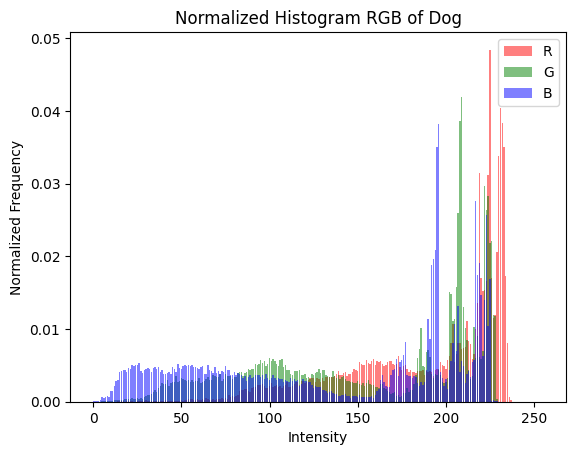

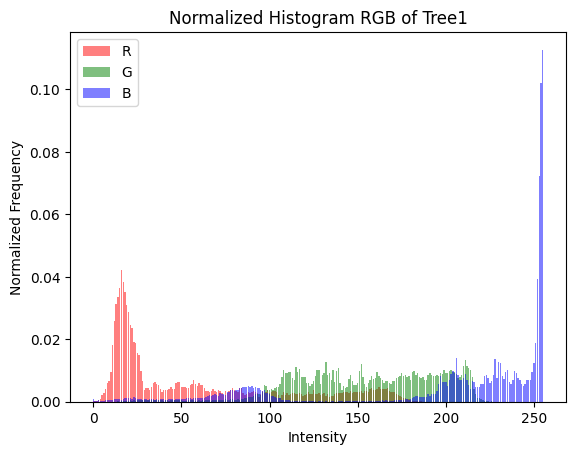

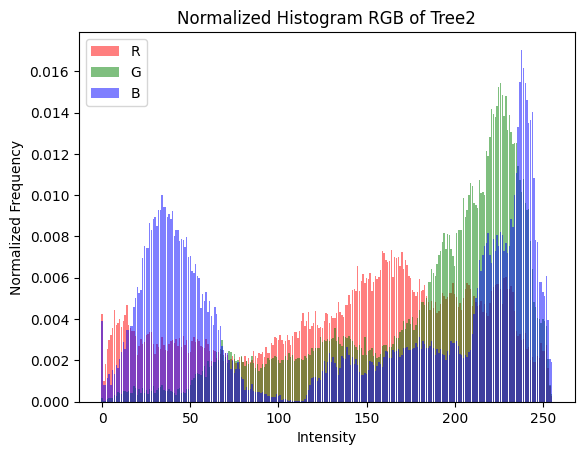

In [250]:
#2. Compute Normalized Histograms for RGB:

hist_RGB_Dog = compute_normalized_histogram(image_RGB_dog, "RGB")
hist_RGB_Tree1 = compute_normalized_histogram(image_RGB_tree1, "RGB")
hist_RGB_Tree2 = compute_normalized_histogram(image_RGB_tree2, "RGB")


plot_histogram(image_RGB_dog, hist_RGB_Dog, "RGB", "Dog")
plot_histogram(image_RGB_tree1, hist_RGB_Tree1, "RGB", "Tree1")
plot_histogram(image_RGB_tree2, hist_RGB_Tree2, "RGB", "Tree2")

In [251]:
# 3. Transform Image to Other Color Spaces:

image_HSV_dog = cv2.cvtColor(image_bgr_dog, cv2.COLOR_BGR2HSV)
image_HSV_tree1 = cv2.cvtColor(image_bgr_tree1, cv2.COLOR_BGR2HSV)
image_HSV_tree2 = cv2.cvtColor(image_bgr_tree2, cv2.COLOR_BGR2HSV)

image_LAB_dog = cv2.cvtColor(image_bgr_dog, cv2.COLOR_BGR2LAB)
image_LAB_tree1 = cv2.cvtColor(image_bgr_tree1, cv2.COLOR_BGR2LAB)
image_LAB_tree2 = cv2.cvtColor(image_bgr_tree2, cv2.COLOR_BGR2LAB)

image_YCrCb_dog = cv2.cvtColor(image_bgr_dog, cv2.COLOR_BGR2YCrCb)
image_YCrCb_tree1 = cv2.cvtColor(image_bgr_tree1, cv2.COLOR_BGR2YCrCb)
image_YCrCb_tree2 = cv2.cvtColor(image_bgr_tree2, cv2.COLOR_BGR2YCrCb)


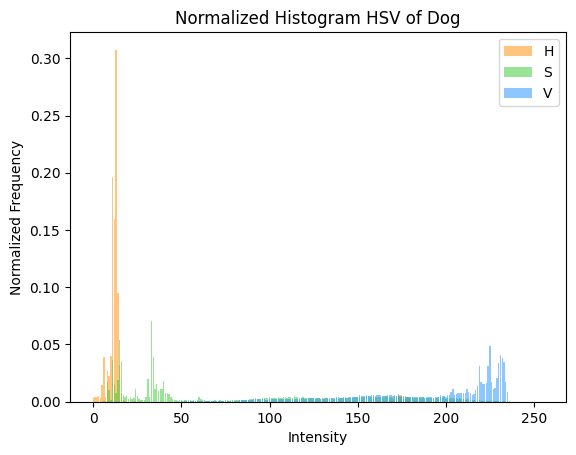

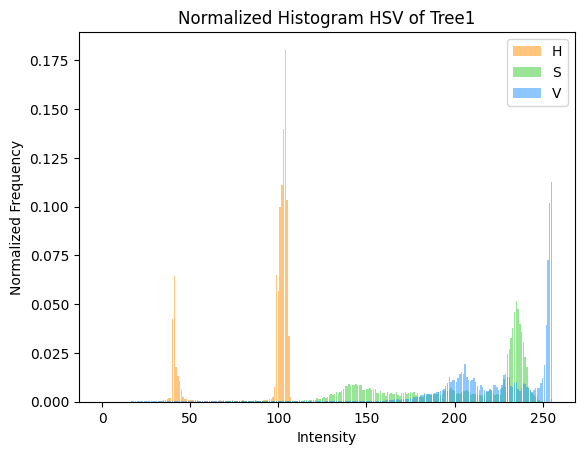

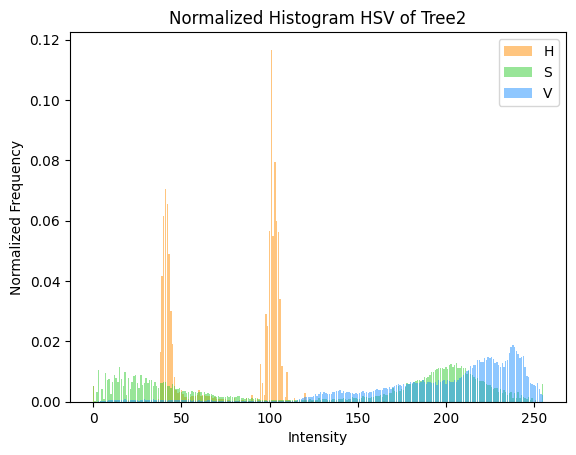

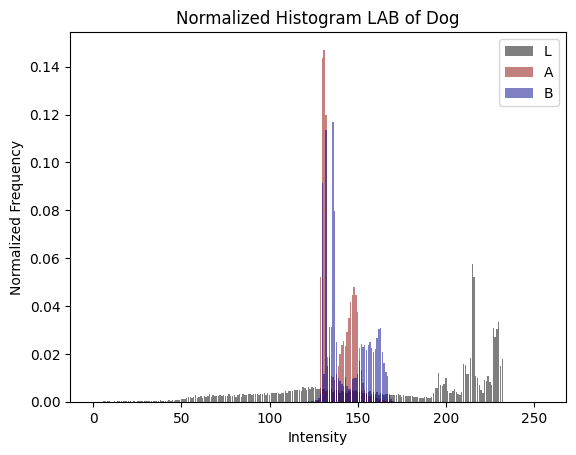

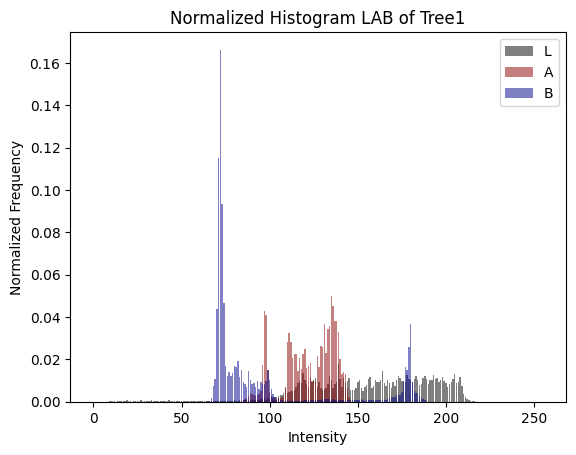

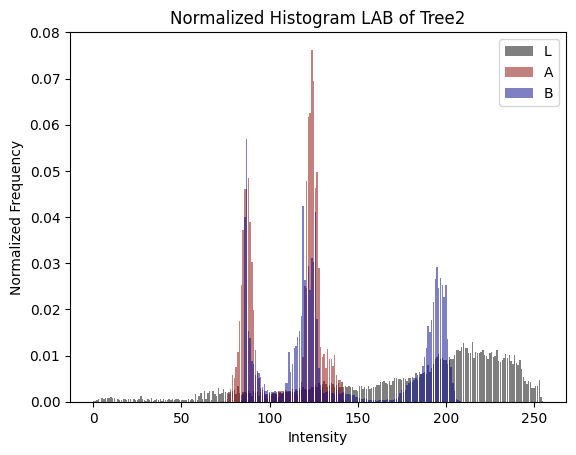

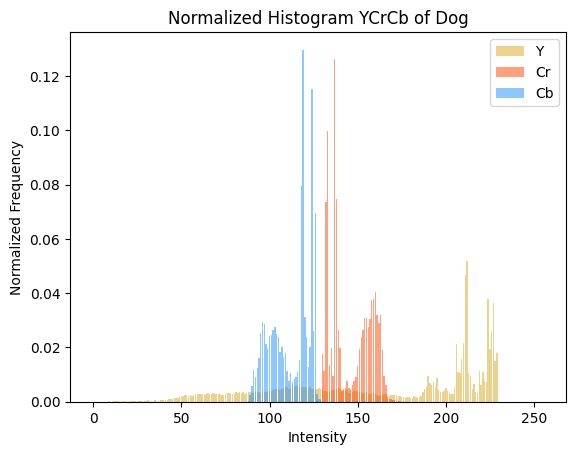

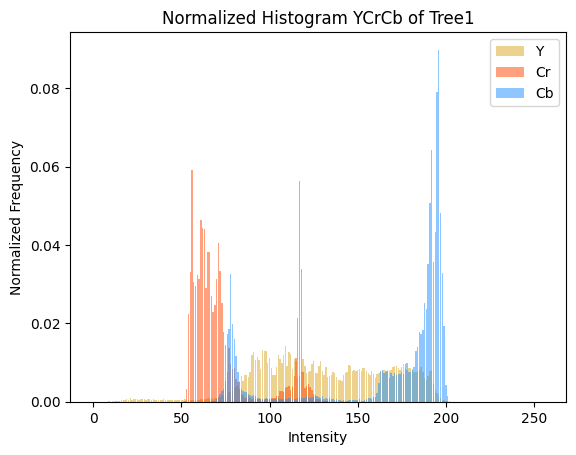

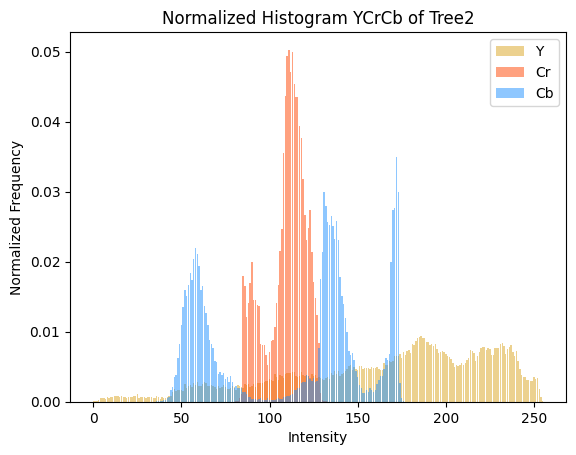

In [252]:
# 4. Compute and Visualize Histograms for Each Color Space:

hist_HSV_Dog = compute_normalized_histogram(image_HSV_dog, "HSV")
hist_HSV_Tree1 = compute_normalized_histogram(image_HSV_tree1, "HSV")
hist_HSV_Tree2 = compute_normalized_histogram(image_HSV_tree2, "HSV")


plot_histogram(image_HSV_dog, hist_HSV_Dog, "HSV", "Dog")
plot_histogram(image_HSV_tree1, hist_HSV_Tree1, "HSV", "Tree1")
plot_histogram(image_HSV_tree2, hist_HSV_Tree2, "HSV", "Tree2")


hist_LAB_Dog = compute_normalized_histogram(image_LAB_dog, "LAB")
hist_LAB_Tree1 = compute_normalized_histogram(image_LAB_tree1, "LAB")
hist_LAB_Tree2 = compute_normalized_histogram(image_LAB_tree2, "LAB")


plot_histogram(image_LAB_dog, hist_LAB_Dog, "LAB", "Dog")
plot_histogram(image_LAB_tree1, hist_LAB_Tree1, "LAB", "Tree1")
plot_histogram(image_LAB_tree2, hist_LAB_Tree2, "LAB", "Tree2")

hist_YCrCb_Dog = compute_normalized_histogram(image_YCrCb_dog, "YCrCb")
hist_YCrCb_Tree1 = compute_normalized_histogram(image_YCrCb_tree1, "YCrCb")
hist_YCrCb_Tree2 = compute_normalized_histogram(image_YCrCb_tree2, "YCrCb")


plot_histogram(image_YCrCb_dog, hist_YCrCb_Dog, "YCrCb", "Dog")
plot_histogram(image_YCrCb_tree1, hist_YCrCb_Tree1, "YCrCb", "Tree1")
plot_histogram(image_YCrCb_tree2, hist_YCrCb_Tree2, "YCrCb", "Tree2")


In [253]:
# 5. and 6. Comparing histograms
comparison_HSV_RGB_Dog = compare_histograms_via_correlation(hist_HSV_Dog, hist_RGB_Dog)
comparison_LAB_RGB_Dog = compare_histograms_via_correlation(hist_LAB_Dog, hist_RGB_Dog)
comparison_YCrCb_RGB_Dog = compare_histograms_via_correlation(hist_YCrCb_Dog, hist_RGB_Dog)

comparison_HSV_RGB_Tree1 = compare_histograms_via_correlation(hist_HSV_Tree1, hist_RGB_Tree1)
comparison_LAB_RGB_Tree1 = compare_histograms_via_correlation(hist_LAB_Tree1, hist_RGB_Tree1)
comparison_YCrCb_RGB_Tree1 = compare_histograms_via_correlation(hist_YCrCb_Tree1, hist_RGB_Tree1)

comparison_HSV_RGB_Tree2 = compare_histograms_via_correlation(hist_HSV_Tree2, hist_RGB_Tree2)
comparison_LAB_RGB_Tree2 = compare_histograms_via_correlation(hist_LAB_Tree2, hist_RGB_Tree2)
comparison_YCrCb_RGB_Tree2 = compare_histograms_via_correlation(hist_YCrCb_Tree2, hist_RGB_Tree2)

print("Comparisons with the Dog Image:\n", f"HSV and RGB: {comparison_HSV_RGB_Dog} \n", 
      f"LAB and RGB: {comparison_LAB_RGB_Dog} \n", f"YCrCb and RGB: {comparison_YCrCb_RGB_Dog} \n")

print("Comparisons with the Tree1 Image:\n", f"HSV and RGB: {comparison_HSV_RGB_Tree1} \n", 
      f"LAB and RGB: {comparison_LAB_RGB_Tree1} \n", f"YCrCb and RGB: {comparison_YCrCb_RGB_Tree1} \n")

print("Comparisons with the Tree2 Image:\n", f"HSV and RGB: {comparison_HSV_RGB_Tree2} \n", 
      f"LAB and RGB: {comparison_LAB_RGB_Tree2} \n", f"YCrCb and RGB: {comparison_YCrCb_RGB_Tree2} \n")


comparison_LAB_YCrCb_Dog = compare_histograms_via_correlation(hist_LAB_Dog, hist_YCrCb_Dog)

print(comparison_LAB_YCrCb_Dog)

Comparisons with the Dog Image:
 HSV and RGB: [-0.0855790054902527, -0.1191865113536669, 0.21045674364446676] 
 LAB and RGB: [0.44068496267323903, -0.01825436966163527, -0.14947027265481455] 
 YCrCb and RGB: [0.3890153174448013, -0.049877313974329596, -0.05846724159977803] 

Comparisons with the Tree1 Image:
 HSV and RGB: [-0.02081219726749764, -0.019253299034371753, 0.98554302122579] 
 LAB and RGB: [-0.23121681392046842, 0.3849496185395639, -0.03502627664677943] 
 YCrCb and RGB: [-0.16557406631182417, -0.1717430224143594, -0.03028271091355014] 

Comparisons with the Tree2 Image:
 HSV and RGB: [-0.17707006575170728, 0.3532865829929187, 0.5775509638943653] 
 LAB and RGB: [0.49505746594022704, -0.12726495957387493, -0.3162284939890789] 
 YCrCb and RGB: [0.6607956978735491, -0.1699764270433862, -0.13992878309955822] 

[0.4173286451627714, 0.31514637632069087, -0.07606038204323574]


<function matplotlib.pyplot.show(close=None, block=None)>

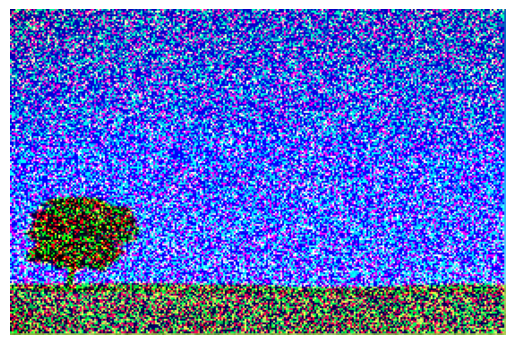

In [258]:
# Question 3.
image_RGB_noisy_tree1 = salt_pepper(image_RGB_tree1, 0.5, 0.5)

plt.imshow(image_RGB_noisy_tree1)
plt.axis('off')
plt.savefig("images/dataset_histograms/tree1_noisy.jpg", bbox_inches="tight", pad_inches=0)
plt.show

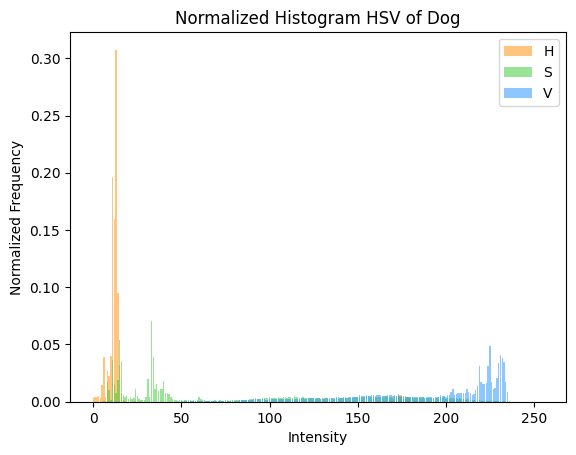

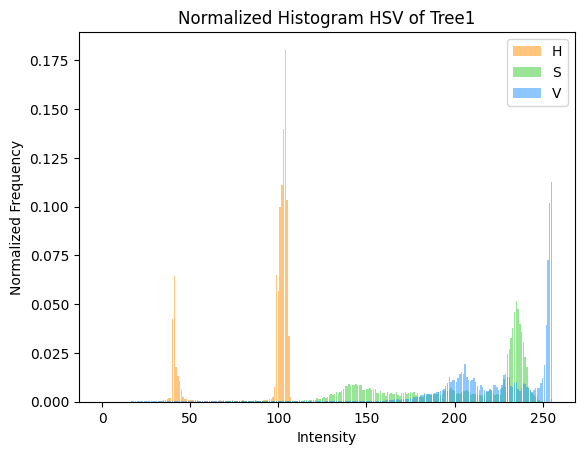

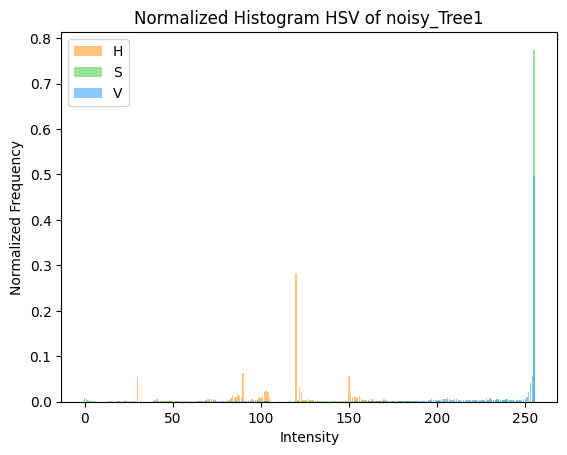

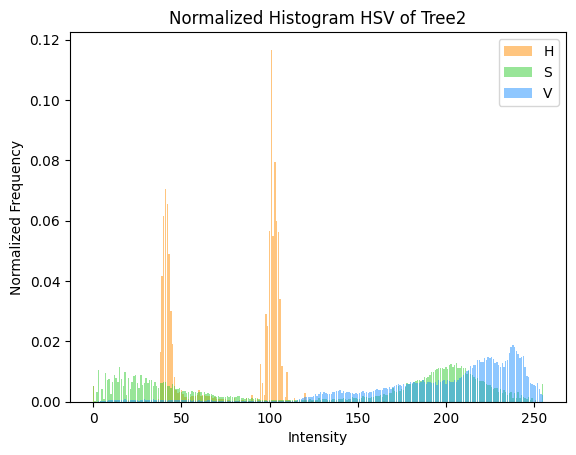

In [262]:
image_HSV_noisy_tree1 = cv2.cvtColor(image_RGB_noisy_tree1, cv2.COLOR_RGB2HSV)
hist_HSV_noisy_Tree1 = compute_normalized_histogram(image_HSV_noisy_tree1, "HSV")

plot_histogram(image_HSV_dog, hist_HSV_Dog, "HSV", "Dog")
plot_histogram(image_HSV_tree1, hist_HSV_Tree1, "HSV", "Tree1")
plot_histogram(image_HSV_noisy_tree1, hist_HSV_noisy_Tree1, "HSV", "noisy_Tree1")
plot_histogram(image_HSV_tree2, hist_HSV_Tree2, "HSV", "Tree2")

In [257]:
comparison_Dog_Tree1 = compare_histograms_via_correlation(hist_HSV_Dog, hist_HSV_Tree1)
comparison_Dog_noisy_Tree1 = compare_histograms_via_correlation(hist_HSV_Dog, hist_HSV_noisy_Tree1)
comparison_Dog_Tree2 = compare_histograms_via_correlation(hist_HSV_Dog, hist_HSV_Tree2)
comparison_Tree1_Tree2 = compare_histograms_via_correlation(hist_HSV_Tree1, hist_HSV_Tree2)
comparison_Tree1_noisy_Tree1 = compare_histograms_via_correlation(hist_HSV_Tree1, hist_HSV_noisy_Tree1)
comparison_noisy_Tree1_Tree2 = compare_histograms_via_correlation(hist_HSV_noisy_Tree1, hist_HSV_Tree2)

print("Comparisons with of the Tree1 image histogram with the other HSV Image Histograms:\n", f"Tree1 and Dog: {comparison_Dog_Tree1} \n", 
      f"Tree1 and noisy Tree1: {comparison_Tree1_noisy_Tree1} \n", f"Tree1 and Tree2: {comparison_Tree1_Tree2} \n")


Comparisons with of the Tree1 image histogram with the other HSV Image Histograms:
 Tree1 and Dog: [-0.030439834691434152, -0.15494060454935002, 0.0976949737294851] 
 Tree1 and noisy Tree1: [0.02120607815523523, 0.13459340736782643, 0.6184356919460982] 
 Tree1 and Tree2: [0.8191682059931766, -0.01324727890965416, 0.24847780460743182] 



**Questions that must be included in your Report**.

Answer the questions briefly and directly, including the images obtained from the execution of your code to explain your conclusions. Answers must be connected to the executed code.

1. What is the purpose of normalizing histograms, and how does this technique would help in feature extraction for image processing tasks?

2. After transforming an image to HSV, LAB, and YCrCb color spaces, how does the interpretation of intensity values in each color space change compared to the RGB color space? Visualize the histograms of each space.

3. Apply salt-and-pepper noise to the tree1.jpg image located in the dataset_histogram folder, and save the resulting noisy image as tree1_noisy.jpg in the same folder. Select a color space (e.g., HSV, LAB, or YCrCb) and compute the histograms for all images in the dataset_histogram folder, including tree1.jpg and tree1_noisy.jpg. Finally, **compare the histograms**: evaluate the similarity between the histogram of tree1.jpg and the histograms of all other images in the dataset using a similarity metric such as correlation.

# **SIFT, SURF, and ORB**

In this exercise, you will apply features description algorithms: SIFT, SURF, and ORB. These methods enable robust detection of distinctive features within images, which can be used for tasks such as matching, recognition, and tracking. Follow the steps below to complete the implementation:

1. **Load and Display Images**

* Load diverse images using OpenCV.
* Convert them from BGR to RGB for proper visualization.
* Display images with Matplotlib to confirm the input data.

2. **Implement Feature Extraction**

* Use OpenCV's built-in functions to implement the algorithms:
  * SIFT: For precise and stable feature detection.
  * ORB: For efficient, real-time feature detection.
  * SURF (optional): A balance between SIFT's robustness and ORB's speed.

3. **Apply Feature Detection**

* Run each algorithm on the images.
* Detect keypoints and compute descriptors.
* Visualize keypoints overlaid on the images.

4. **Benchmark Performance**

* Count the number of keypoints detected by each algorithm.
* Measure runtime to evaluate computational efficiency.

5. **Compare and Analyse Results**

* Compare the algorithms based on keypoint precision, speed, and robustness to transformations (e.g., scaling or rotation).
* Highlight strengths and weaknesses of each.







In [ ]:
# !pip install opencv-python matplotlib
# !pip install opencv-contrib-python

In [ ]:
import cv2
import matplotlib.pyplot as plt
import time

# Function to load images
def load_image(image_paths):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# SIFT implementation
def apply_sift(image):
    # Your Code goes Here!
    return keypoints, descriptors

# ORB implementation
def apply_orb(image):
    # Your Code goes Here!
    return keypoints, descriptors

# SURF implementation (optional)
def apply_surf(image):
    # Your Code goes Here!
    return keypoints, descriptors

# Plot keypoints
def plot_keypoints(image, keypoints, title):
    img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.figure(figsize=(8, 8))
    plt.title(title)
    plt.imshow(img_with_keypoints)
    plt.axis('off')
    plt.show()

# Performance analysis
def benchmark(feature_extractor, image):
    start = time.time()
    keypoints, descriptors = feature_extractor(image)
    end = time.time()
    return len(keypoints), end - start

# Main program
# Your Code goes Here!

**Questions that must be included in your Report**.

Answer the questions briefly and directly, including the images obtained from the execution of your code to explain your conclusions. Answers must be connected to the executed code.

4. What impact does the computational time of each feature extraction method (SIFT, SURF, ORB) have on processing larger image datasets or real-time applications? Which method is the most efficient in terms of speed?

5. How do modifications such as noise, scale, and rotation affect the performance of SIFT, SURF, and ORB in terms of keypoint detection and description?

6. How do the detected keypoints appear visually when overlaid on the image for each method (SIFT, SURF, ORB)? Are there any noticeable differences in the locations or distribution of keypoints?

# **Bag of Visual Words**

In this exercise, you will explore the **Bag of Visual Words (BoVW)** model for image classification. The process involves using **SIFT** (Scale-Invariant Feature Transform) to extract key features from images. These features are then clustered into "visual words," which collectively form a vocabulary for representing the images. Once the visual words are created, machine learning algorithms can be applied to classify images based on these feature representations. By completing this exercise, you will gain hands-on experience in **feature extraction**, **clustering**, and applying **machine learning** for image classification. Follow the steps below to complete the implementation:

1. **Dataset Loading:**
Load the dataset by traversing the directory structure to obtain image paths and corresponding class labels.

2. **Feature Detection and Description:**
Extract local features from each image using the SIFT algorithm.

3. **Codebook Creation:**
Cluster the extracted feature descriptors using k-means clustering to form a visual vocabulary (codebook).

4. **Feature Quantization:**
Assign each feature descriptor to the nearest visual word in the codebook and generate a histogram representation for each image.

5. **Histogram Normalization:**
Normalize the histograms with L2 Normalization to ensure comparability across images.

6. **Classifier Training:**
Train a Support Vector Machine (SVM) using the normalized histograms as input.

7. **Classification:**
Classify the test images by predicting labels using the trained SVM.

8. **Model Evaluation:**
Evaluate the model's performance using metrics such as overall accuracy, per-class accuracy, and precision.

In [ ]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Function to load dataset
def load_dataset(paths, classes):
    image_paths = []
    labels = []
    for i, dataset_path in enumerate(paths):
        for class_label in classes:
            class_dir = os.path.join(dataset_path, class_label)
            if os.path.isdir(class_dir):
                for img_file in os.listdir(class_dir):
                    if img_file.endswith(('.jpg', '.png', '.jpeg')):
                        image_paths.append(os.path.join(class_dir, img_file))
                        labels.append(classes.index(class_label))
    return image_paths, labels

# Function to extract SIFT features
def extract_sift_features(image_paths):
    # Your Code goes Here!
    return descriptors_list

# Function to create the codebook
def create_codebook(descriptors_list, num_clusters=50):
    # Your Code goes Here!
    return kmeans

# Function to quantize features
def quantize_features(descriptors_list, kmeans):
    # Your Code goes Here!
    return np.array(histograms)

# Function to normalize histograms
def normalize_histograms(histograms):
    return histograms / np.linalg.norm(histograms, axis=1, keepdims=True)

# Function to train the SVM
def train_svm(histograms, labels):
    # Your Code goes Here!
    return svm, scaler

# Function to classify images
def classify_images(histograms, svm, scaler):
    # Your Code goes Here!
    return svm.predict(histograms_scaled)

# Function to evaluate per-class performance
def evaluate_per_class(true_labels, predictions, classes):
    # Your Code goes Here!
    print(report)
    return

# Dataset configuration
CLASSES = ['aquarium', 'desert'] # Only use these two classes.
PATHS = ('/dataset_bovw/train/',
         '/dataset_bovw/test/')

# Load dataset
train_image_paths, train_labels = load_dataset([PATHS[0]], CLASSES)
test_image_paths, test_labels = load_dataset([PATHS[1]], CLASSES)

# Print dataset summary
print(f"Training Set: {len(train_image_paths)} images")
print(f"Test Set: {len(test_image_paths)} images")

# Step 1: Extract SIFT Features
train_descriptors_list = extract_sift_features(train_image_paths)
test_descriptors_list = extract_sift_features(test_image_paths)

# Step 2: Create Codebook using training features
num_clusters = 10  # Adjust this based on your dataset
kmeans = create_codebook(train_descriptors_list, num_clusters)

# Step 3: Quantize Features
train_histograms = quantize_features(train_descriptors_list, kmeans)
test_histograms = quantize_features(test_descriptors_list, kmeans)

# Step 4: Normalize Histograms
normalized_train_histograms = normalize_histograms(train_histograms)
normalized_test_histograms = normalize_histograms(test_histograms)

# Step 5: Train Classifier
svm, scaler = train_svm(normalized_train_histograms, train_labels)

# Step 6: Classify Test Images
test_predictions = classify_images(normalized_test_histograms, svm, scaler)

# Step 7: Evaluate Model Per-class
evaluate_per_class(test_labels, test_predictions, CLASSES)


**Questions that must be included in your Report**.

Answer the questions briefly and directly, including the images obtained from the execution of your code to explain your conclusions. Answers must be connected to the executed code.

7. What role does the SIFT algorithm play in the BoVW model, and how is it used for feature extraction?

8. Explain the process of creating the vocabulary (codebook) in the BoVW model. Why is clustering important, and how does K-Means contribute to this process?

9. How do you convert the feature descriptors of images into histograms of visual words? What is the importance of the histogram in the BoVW framework?

10. Why is normalization of the histograms necessary before feeding them into the classifier? What method is used for normalization in this exercise?

11. Evaluate the model on the test set by calculating precision and recall for each class, and generating a confusion matrix to analyse its performance.